<a href="https://colab.research.google.com/github/samisarda/Behavior-Analytics-for-a-E-Retailer/blob/main/RetailerCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis with Pandas & Matplotlib

## Topics

- Read data from excel
- Data Viz: scatter plot, line chart
- Statistics: Distribution summaries
- Pandas: groupby and MultiIndex


### Dataset
- Dataset Used: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#
- Download file: https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx


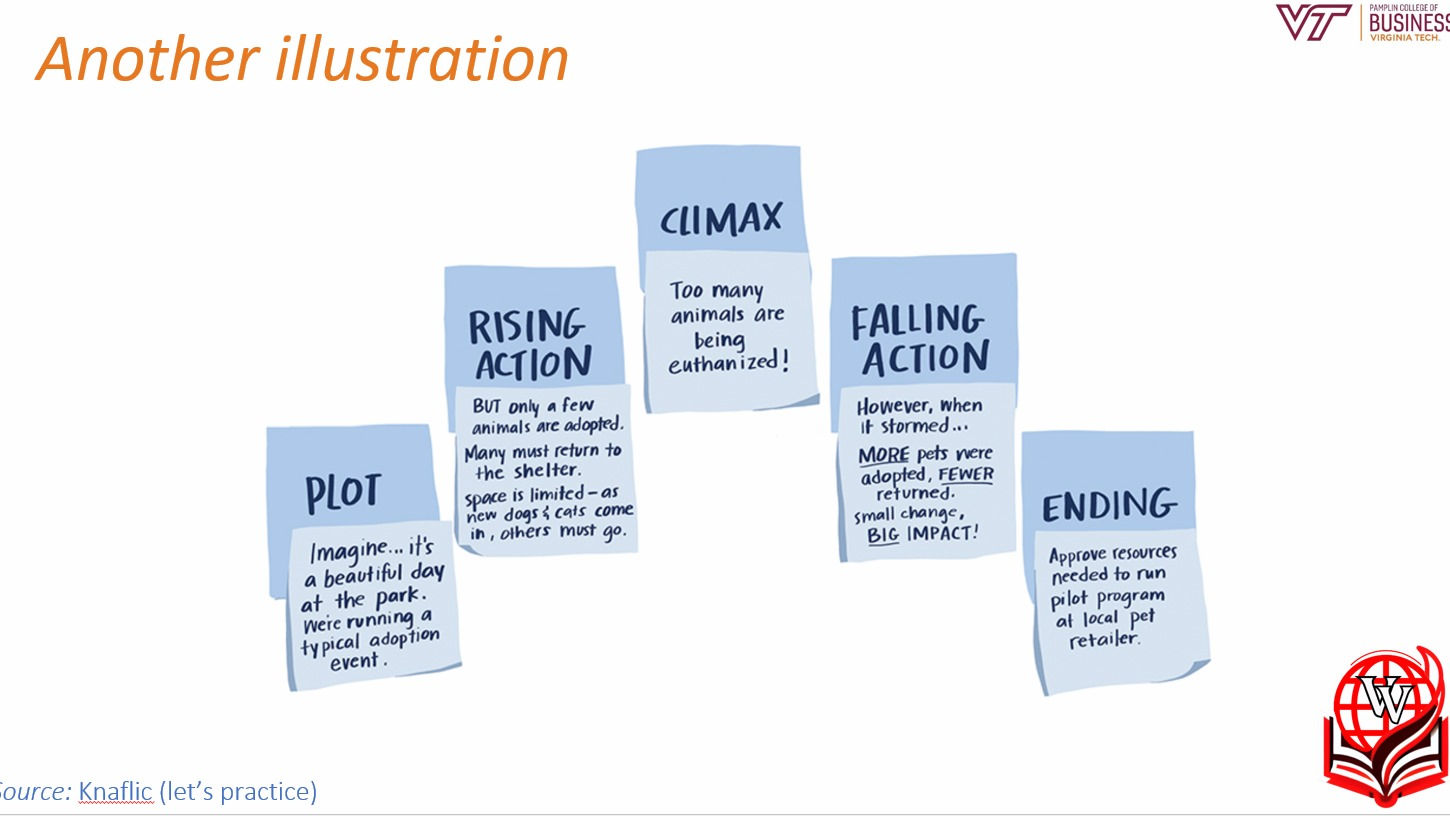

In [ ]:
import os
import pandas as pd
import numpy as np
print(os.path.getsize("combined copy.xlsx"))

# Data visualization
import matplotlib.pyplot as plt
import plotly.express as px

43783563


In [ ]:
pip install openpyxl

In [ ]:
# Download the file and put it in the data folder
df = pd.read_excel("combined copy.xlsx")

# or just read the file directly.
# df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx")

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(1016946, 8)

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016946 entries, 0 to 1016945
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1016946 non-null  object        
 1   StockCode    1016946 non-null  object        
 2   Description  1012671 non-null  object        
 3   Quantity     1016946 non-null  int64         
 4   InvoiceDate  1016946 non-null  datetime64[ns]
 5   Price        1016946 non-null  float64       
 6   Customer ID  782728 non-null   float64       
 7   Country      1016946 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 254.0 MB


# Columns Description

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

In [ ]:
print(df.shape)

(1016946, 8)


In [ ]:
print("customerID Null: ",df['Customer ID'].isna().sum())
print("Invoice Null: ",df['Invoice'].isna().sum())
print("Stock Code Null: ",df['StockCode'].isna().sum())
print("Description Null: ",df['Description'].isna().sum())
print("Quantity Null: ",df['Quantity'].isna().sum())
print("Country Null: ",df['Country'].isna().sum())

customerID Null:  234218
Invoice Null:  0
Stock Code Null:  0
Description Null:  4275
Quantity Null:  0
Country Null:  0


In [ ]:
#df.columns.str.replace(" ", "_").str.lower()

In [ ]:
# change columns to camelcase and remove whitespace in between
# this is useful for using the df.column_name syntax later on
df1=df
df1.columns = ['invoiceId','stockCode', 'description', 'quantity', 'date','price', 'customerId', 'country']

In [ ]:
df1.head()

,invoiceId,stockCode,description,quantity,date,price,customerId,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
i = df1[(df1.stockCode == 'B')].index
for x in i:
  i.drop(x)


In [ ]:
df1= df1[df1['quantity'] > 0]
df1= df1[df1['price'] > 0]

In [ ]:
#df1['sales'].mean()

In [ ]:
import re
df1['description']=df1['description'].astype(str)
#j = df1[df1['stockCode'].str.contains(r'B', case=False, na=False)].index
i = df1[df1['description'].str.contains(r'damaged|\?', case=False, na=False)].index
df1.drop(i, inplace=True)
#df1.drop(j, inplace=True)

<ipython-input-15-91e30eb05cda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['description']=df1['description'].astype(str)


In [ ]:
# import re
# i = df[(df.description == 'damaged'or */?*)].index
# for x in i:
#   df.drop(x)

## 1. Simple Statistics

The idea of this is to understand better the dataset

In [ ]:
# Number of invoice_ids
df1.invoiceId.unique().shape

(39387,)

In [ ]:
# Number of item_ids
df1.stockCode.unique().shape

(4914,)

In [ ]:
# Number of description
df1.description.unique().shape

(5396,)

In [ ]:
# Number of customers
df1.customerId.unique().shape

(5705,)

In [ ]:
# Start/End of date
df1.date.min(), df1.date.max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [ ]:
# number of countries
df1.country.unique().shape

(10,)

## 2. Initial data analysis

In [ ]:
df1.quantity.min()

1

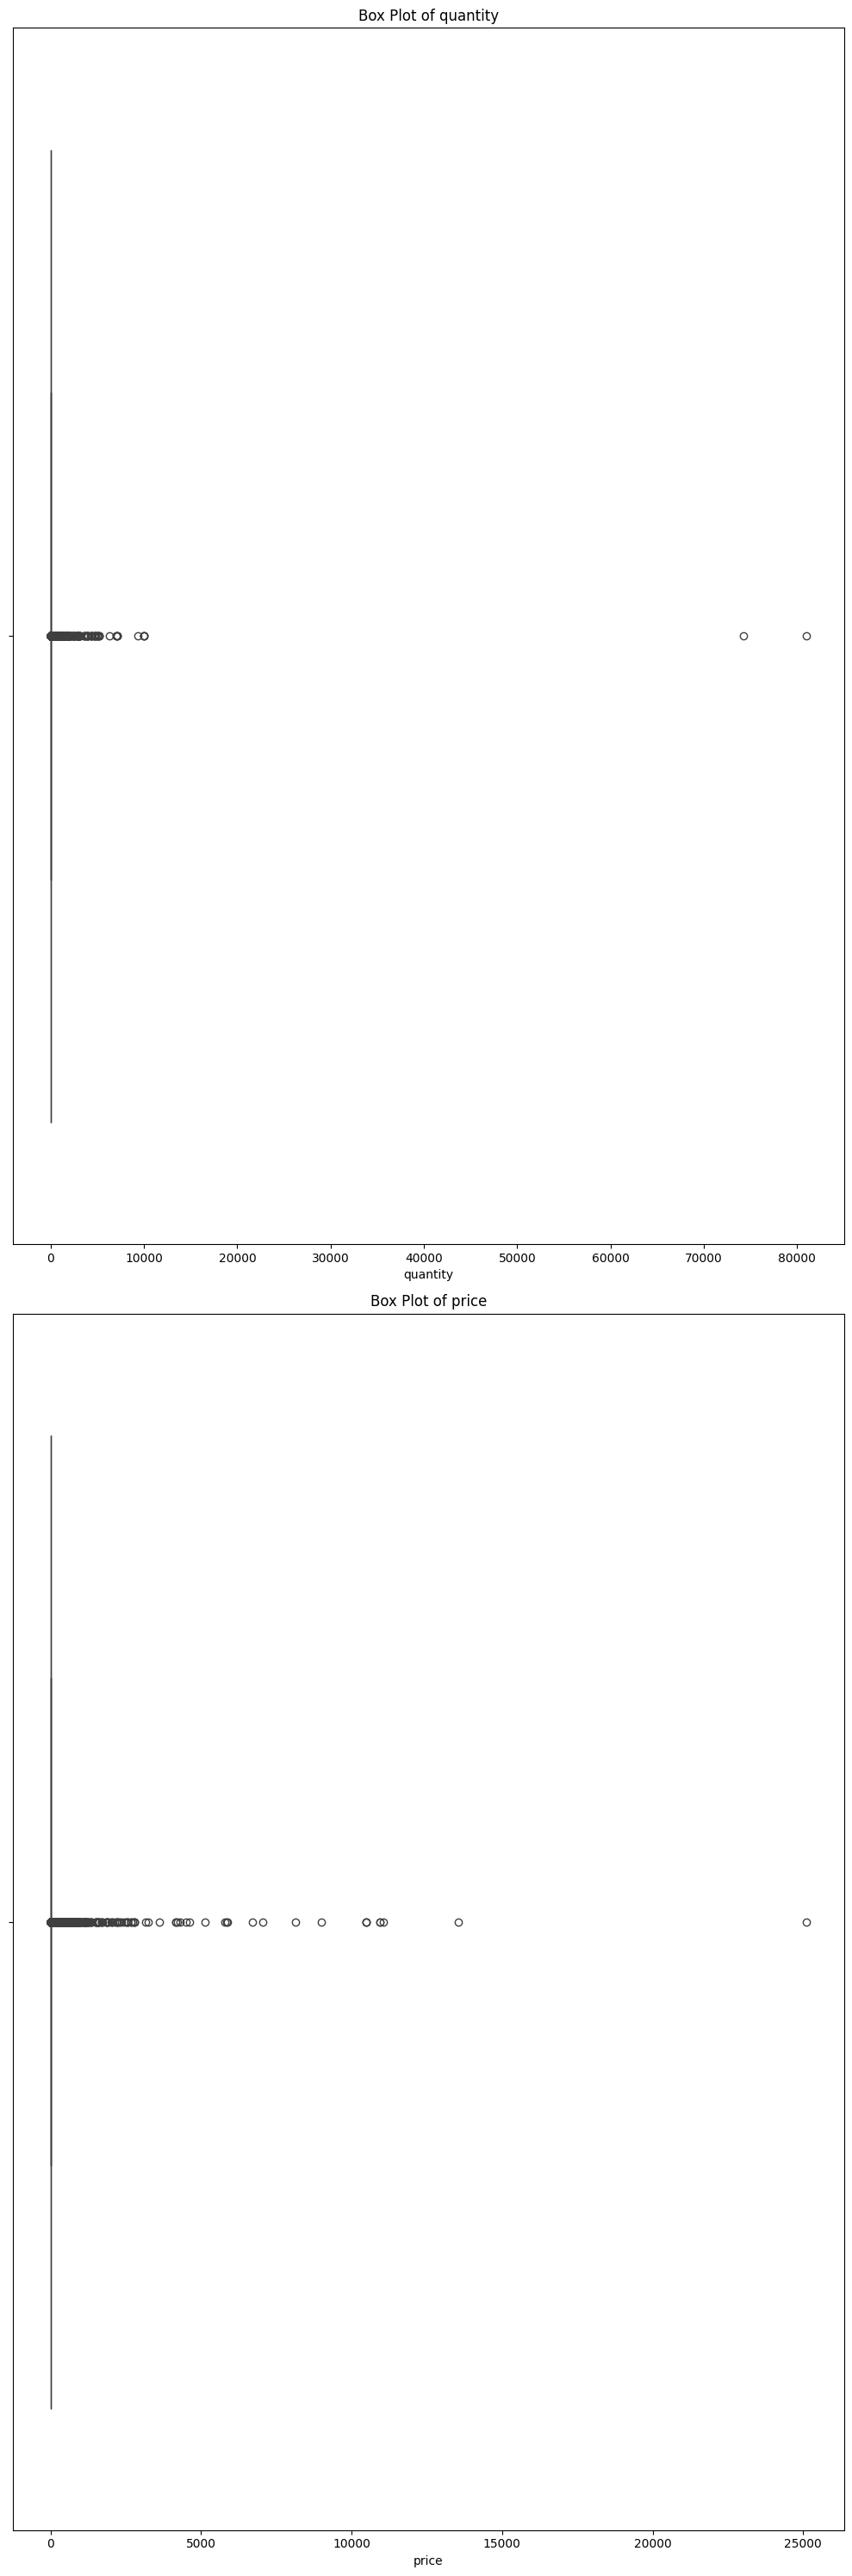

In [ ]:
import seaborn as sns
cols = ["quantity", "price"]
plt.figure(figsize=(10, 30))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.boxplot(x=col, data=df1)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
#anomaly detection
columns = ['quantity','price']
for column in columns:
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    IQR = q3 - q1
    UL = q3 + 1.5 * IQR
    LL = q1 - 1.5 * IQR
    df1 = df1[(df1[column] > LL) & (df1[column] < UL)]

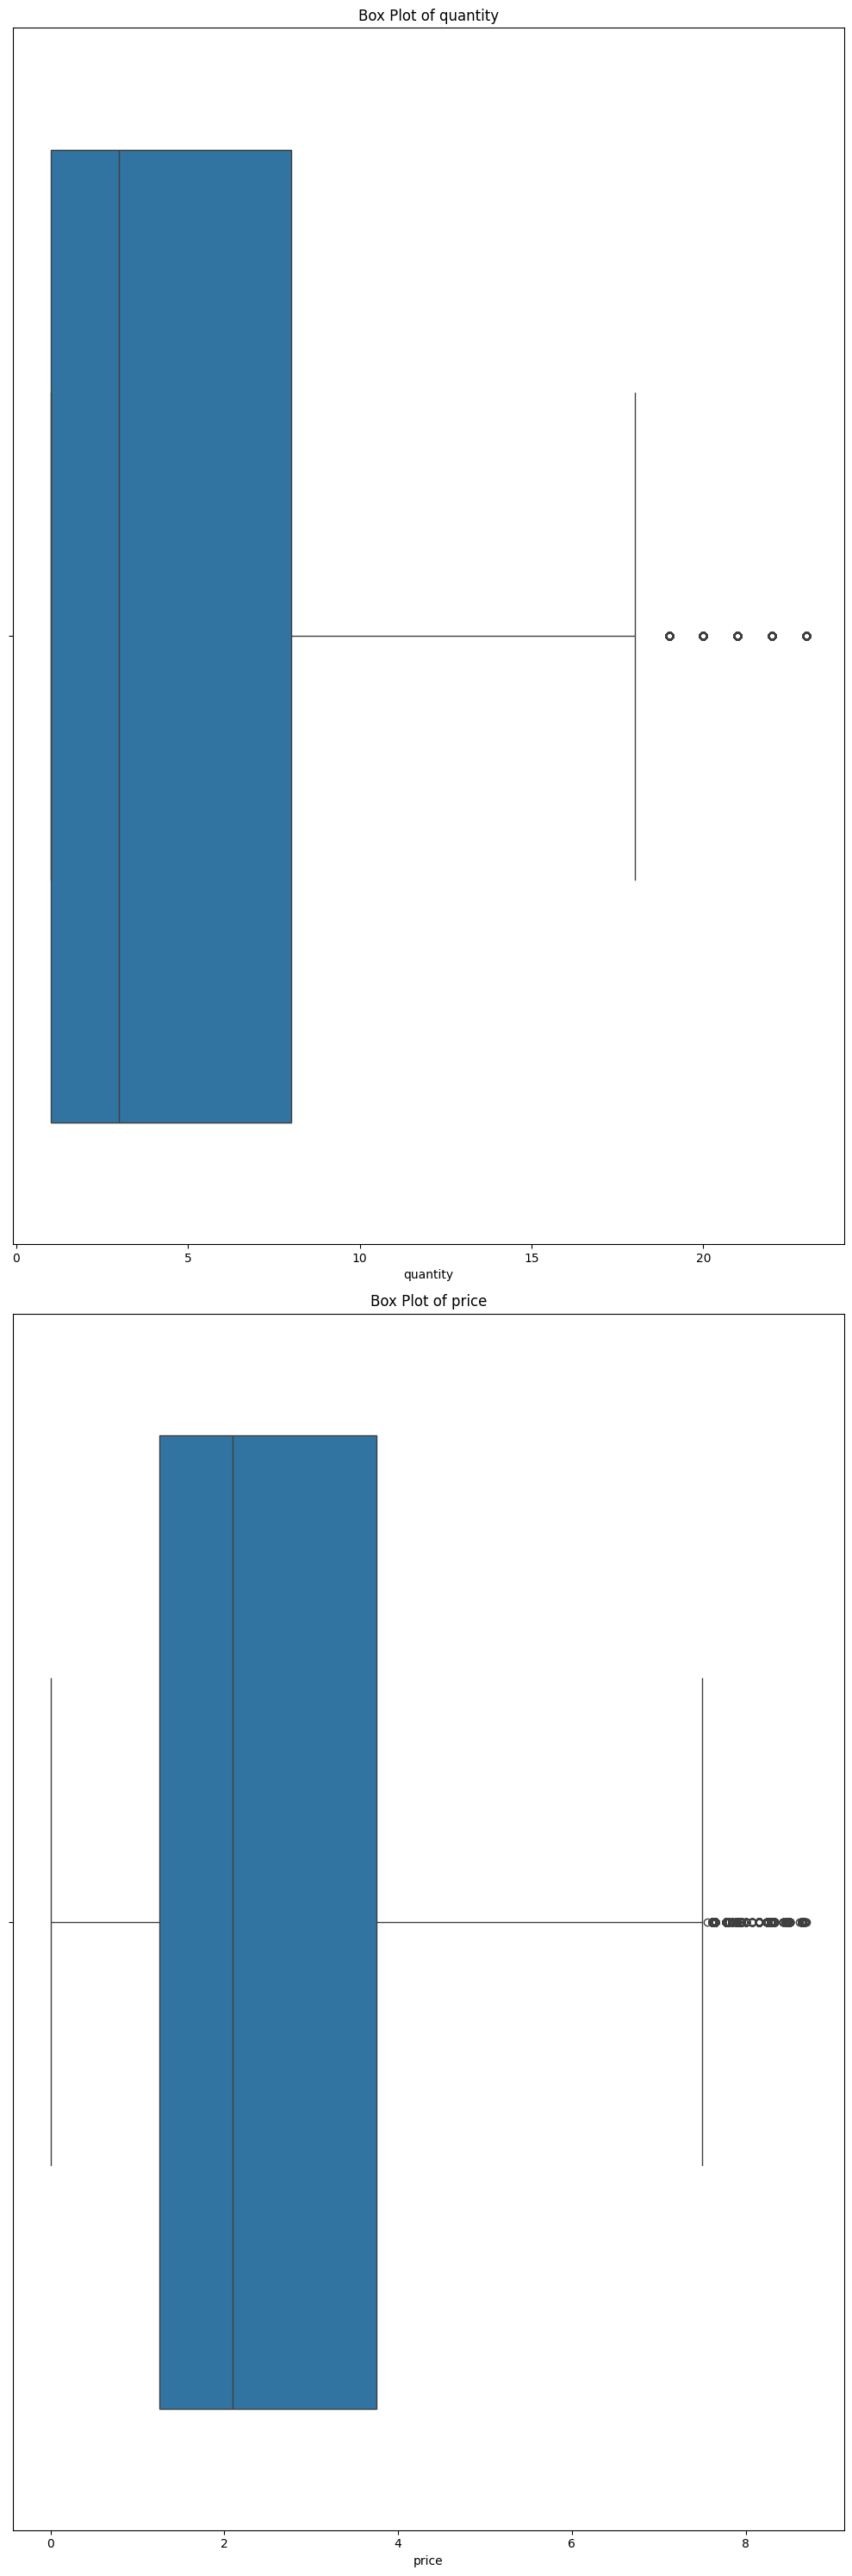

In [ ]:
import seaborn as sns
cols = ["quantity", "price"]
plt.figure(figsize=(10, 30))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.boxplot(x=col, data=df1)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
df1.shape

(825947, 8)

In [ ]:
print("customerID Null: ",df['customerId'].isna().sum())


customerID Null:  234218


In [ ]:
# let's create the sales column
df1['sales'] = df1['quantity'] * df1['price']

In [ ]:
df1.head()

,invoiceId,stockCode,description,quantity,date,price,customerId,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6


In [ ]:
# global distribution of the time series
# negative values are probably refunds
df1.sales.quantile([0, 0.25, 0.5, 0.75, 1])

,sales
0.00,0.001
0.25,3.300
0.50,7.500
0.75,15.300
1.00,194.810


<Axes: >

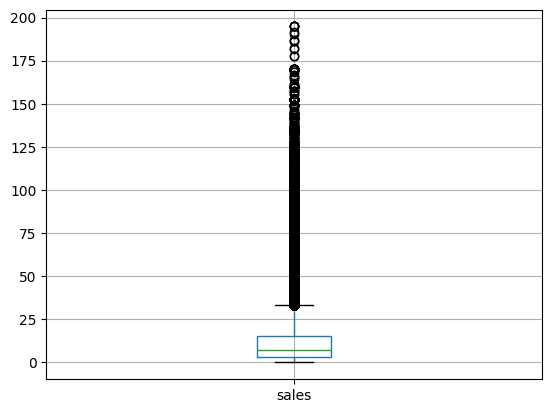

In [ ]:
df1.boxplot('sales')

In [ ]:
# invoice_id starts with C when we have a refund.
# Also the quantity is negative
df1.query("sales < 0").head()

,invoiceId,stockCode,description,quantity,date,price,customerId,country,sales


## 2.1. Demand curve

In [ ]:
df.quantity.max()

80995

In [ ]:
'''(
    df1.query("price > 0 & quantity > 0")
    .plot(x='quantity', y='price',
          kind='scatter',
          loglog=True,
          alpha=0.1)
);'''

'(\n    df1.query("price > 0 & quantity > 0")\n    .plot(x=\'quantity\', y=\'price\',\n          kind=\'scatter\',\n          loglog=True,\n          alpha=0.1)\n);'

In [ ]:
# how to read the axis labels
10**0.5, 10**1, 10**2, 10**3, 10**4

(3.1622776601683795, 10, 100, 1000, 10000)

## 2.2. Sales at the daily level

In [ ]:
# compact method
agg_daily_sales = df1.groupby("date")['sales'].sum()

In [ ]:
# one operation by line
agg_daily_sales = (
    df1.groupby("date")   # groupby
    ['sales']            # select a column
    .sum()               # function to apply
)
agg_daily_sales

,sales
date,
2009-12-01 07:45:00,304.90
2009-12-01 07:46:00,106.20
2009-12-01 09:06:00,528.33
2009-12-01 09:08:00,282.90
2009-12-01 09:28:00,291.30
...,...
2011-12-09 12:20:00,104.81
2011-12-09 12:21:00,29.88
2011-12-09 12:31:00,263.11


In [ ]:
type(agg_daily_sales)

pandas.core.series.Series

<Axes: title={'center': 'Total Sales - Daily Frequency'}, xlabel='date'>

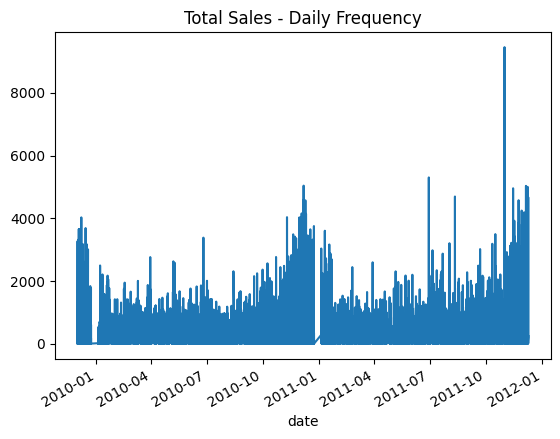

In [ ]:
agg_daily_sales.plot(title = 'Total Sales - Daily Frequency')

## 2.3. Lets aggregate at the weekly level

<Axes: xlabel='date'>

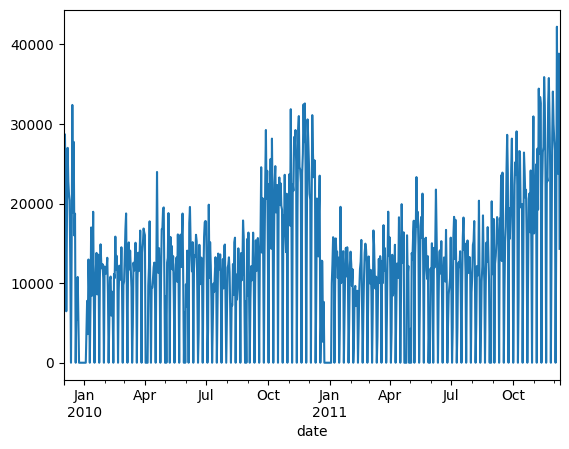

In [ ]:
agg_daily_sales.resample("D").sum().plot()

<Axes: xlabel='date'>

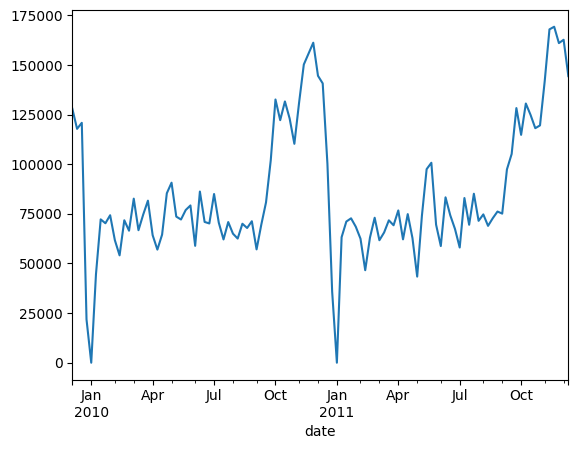

In [ ]:
agg_daily_sales.resample("W").sum().plot()

## 3.1. Let's compute some statistics at the country level

In [ ]:
agg_country = (
    df1.groupby("country")
    ['sales']
    .agg(['std', 'sum', 'mean', 'median', 'count'])
).reset_index()


# sort by total
agg_country = agg_country.sort_values("sum", ascending=False)
agg_country.head(10)

,country,std,sum,mean,median,count
9,United Kingdom,11.529808,8240398.547,10.571078,6.80,779523
2,EIRE,13.033355,238159.840,19.600020,16.50,12151
4,Germany,12.027297,229443.381,18.590454,16.50,12342
3,France,10.857749,174733.880,17.053863,15.30,10246
8,Switzerland,14.989632,43834.450,20.560249,17.00,2132
7,Spain,10.230713,41896.790,15.103385,15.00,2774
1,Belgium,8.426733,41239.930,17.684361,16.50,2332
6,Portugal,10.885722,31329.730,15.976405,15.30,1961
5,Netherlands,22.128920,29673.300,18.126634,13.52,1637
0,Australia,19.027846,18702.490,22.028846,16.60,849


In [ ]:
agg_country.tail()

,country,std,sum,mean,median,count
7,Spain,10.230713,41896.79,15.103385,15.00,2774
1,Belgium,8.426733,41239.93,17.684361,16.50,2332
6,Portugal,10.885722,31329.73,15.976405,15.30,1961
5,Netherlands,22.128920,29673.30,18.126634,13.52,1637
0,Australia,19.027846,18702.49,22.028846,16.60,849


<Axes: title={'center': 'Top 10 Countries by Average Sales'}, xlabel='country'>

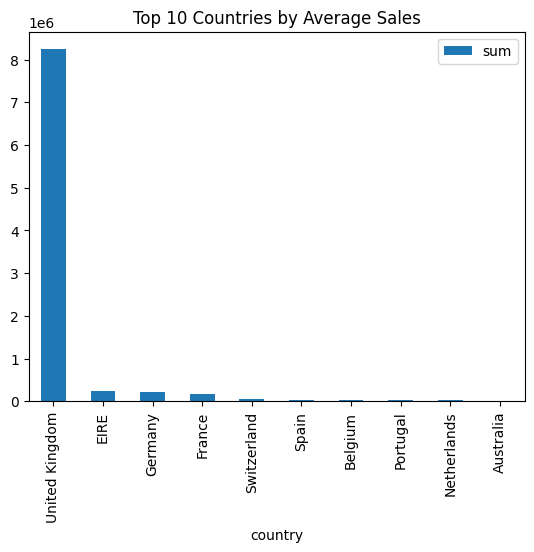

In [ ]:
(agg_country
 .sort_values("sum", ascending=False)
 .head(10)
 .plot(x='country', y='sum', kind='bar',title='Top 10 Countries by Average Sales')
)

## 4.1. Item Level Analysis - MultiIndex example

In [ ]:
df1.head()

,invoiceId,stockCode,description,quantity,date,price,customerId,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6


In [ ]:
df1.sales.quantile([0, 0.25, 0.5, 0.75, 1])

,sales
0.00,0.001
0.25,3.300
0.50,7.500
0.75,15.300
1.00,194.810


In [ ]:
agg_item = (
    df1.groupby("stockCode")
    [['sales', 'quantity', 'price']]
    .agg(['mean', 'median'])
)
agg_item.head()

sales         quantity            price       
               mean median      mean median      mean median
stockCode                                                   
10002      6.045972  5.100  6.670139    5.5  1.021250   0.85
10080      2.863182  3.190  6.590909    5.0  0.536364   0.39
10109      1.680000  1.680  4.000000    4.0  0.420000   0.42
10120      0.909000  0.735  4.066667    3.0  0.246667   0.21
10125      7.296196  3.320  8.791411    3.0  0.940859   0.85

In [ ]:
agg_item.columns

MultiIndex([(   'sales',   'mean'),
            (   'sales', 'median'),
            ('quantity',   'mean'),
            ('quantity', 'median'),
            (   'price',   'mean'),
            (   'price', 'median')],
           )

In [ ]:
new_columns = ["_".join(cols) for cols in agg_item.columns ]
new_columns

['sales_mean',
 'sales_median',
 'quantity_mean',
 'quantity_median',
 'price_mean',
 'price_median']

In [ ]:
agg_item.columns = new_columns

In [ ]:
agg_item.head()

,sales_mean,sales_median,quantity_mean,quantity_median,price_mean,price_median
stockCode,,,,,,
10002,6.045972,5.100,6.670139,5.5,1.021250,0.85
10080,2.863182,3.190,6.590909,5.0,0.536364,0.39
10109,1.680000,1.680,4.000000,4.0,0.420000,0.42
10120,0.909000,0.735,4.066667,3.0,0.246667,0.21
10125,7.296196,3.320,8.791411,3.0,0.940859,0.85


## 4.2 Distribution summary - Item Level

- The 50th percentile of sales-mean is 10.7 and 4.4 for quantity mean
- This gives an idea of the what the average item sold for and the number of sales

In [ ]:
# Compute quartiles for all columns
(
    agg_item
    [['sales_mean', 'quantity_mean']]
    .quantile([0.01, 0.25, 0.5, 0.75, 0.99])
)

,sales_mean,quantity_mean
0.01,0.969706,1.000000
0.25,4.768468,2.500000
0.50,8.093684,3.672727
0.75,12.163153,5.329476
0.99,49.759200,12.000000


In [ ]:
# Compute Deciles for all columns

# increments of 0.1
breaks = np.arange(0, 1.1, 0.1)

(
    agg_item
    [['sales_mean', 'quantity_mean']]
    .quantile(breaks)
)

,sales_mean,quantity_mean
0.0,0.001000,1.000000
0.1,2.808112,1.583648
0.2,4.103092,2.200000
0.3,5.378758,2.728858
0.4,6.661078,3.186364
0.5,8.093684,3.672727
0.6,9.451928,4.235294
0.7,11.216057,4.929645
0.8,13.388994,5.785481
0.9,17.264899,7.037053


In [ ]:
df1.head()

,invoiceId,stockCode,description,quantity,date,price,customerId,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6


In [ ]:
#df1.to_excel('combined_clean.xlsx', sheet_name='Sheet1', index=False)

# RFM

In [ ]:
print("df1: Min Date", df1["date"].min(), "Max Date", df1["date"].max())

df1: Min Date 2009-12-01 07:45:00 Max Date 2011-12-09 12:50:00


In [ ]:
import datetime as dt

# First, find the last purchase date and keep the country information
df_recency = df1.groupby("customerId").agg({
    "date": "max",
    "country": "first"  # Assuming each customer has a single country
}).reset_index()

# Calculate Recency
df_recency["Recency"] = (dt.datetime(2011, 12, 9) - df_recency["date"]).dt.days

# Sort by Recency
df_recency.sort_values(by="Recency", ascending=False, inplace=True)
df_recency.set_index("customerId", inplace=True)
# See the result
df_recency.head()


,date,country,Recency
customerId,,,
17056.0,2009-12-01 12:55:00,United Kingdom,737
17592.0,2009-12-01 10:49:00,United Kingdom,737
13526.0,2009-12-01 13:13:00,United Kingdom,737
14654.0,2009-12-01 12:57:00,United Kingdom,737
17909.0,2009-12-02 13:10:00,United Kingdom,736


In [ ]:
# Group by customerId to get Frequency and Country
df_freq = df1.groupby("customerId").agg({
    "date": "nunique",   # number of unique dates = frequency
    "country": "first"   # assuming each customer has a single country
}).rename(columns={"date": "Frequency"}).reset_index()

# Sort by Frequency
df_freq.sort_values(by="Frequency", ascending=False, inplace=True)

# See the result
df_freq.set_index("customerId", inplace=True)
df_freq.head()

,Frequency,country
customerId,,
14911.0,366,EIRE
12748.0,302,United Kingdom
17841.0,208,United Kingdom
15311.0,202,United Kingdom
14606.0,186,United Kingdom


In [ ]:
# Group by customerId to get Monetary and Country
df_monetary = df1.groupby("customerId").agg({
    "sales": "sum",     # total sales = monetary value
    "country": "first"  # assuming each customer has a single country
}).rename(columns={"sales": "Monetary"}).reset_index()

# Sort by Monetary
df_monetary.sort_values(by="Monetary", ascending=False, inplace=True)
df_monetary.set_index("customerId", inplace=True)
# See the result
df_monetary.head()

,Monetary,country
customerId,,
14911.0,158904.39,EIRE
17841.0,50860.23,United Kingdom
13089.0,49501.00,United Kingdom
14156.0,48718.99,EIRE
17850.0,48140.52,United Kingdom


In [ ]:
rfm = pd.concat([df_recency, df_freq, df_monetary],  axis=1)
rfm.columns = ['date','country1',  'Recency', 'Frequency','country2', 'Monetary','country']
rfm.drop(columns=[rfm.columns[1],rfm.columns[4]], inplace=True)
rfm

,date,Recency,Frequency,Monetary,country
customerId,,,,,
17056.0,2009-12-01 12:55:00,737,1,128.60,United Kingdom
17592.0,2009-12-01 10:49:00,737,1,148.30,United Kingdom
13526.0,2009-12-01 13:13:00,737,2,185.78,United Kingdom
14654.0,2009-12-01 12:57:00,737,1,206.12,United Kingdom
17909.0,2009-12-02 13:10:00,736,1,77.40,United Kingdom
...,...,...,...,...,...
17581.0,2011-12-09 12:21:00,-1,39,13583.16,United Kingdom
12526.0,2011-12-09 12:09:00,-1,3,1091.92,Germany
16558.0,2011-12-09 10:20:00,-1,38,9836.26,United Kingdom


RFM Score

In [ ]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm.head()

,date,Recency,Frequency,Monetary,country,RecencyScore,FrequencyScore,MonetaryScore
customerId,,,,,,,,
17056.0,2009-12-01 12:55:00,737,1,128.60,United Kingdom,1,1,1
17592.0,2009-12-01 10:49:00,737,1,148.30,United Kingdom,1,1,1
13526.0,2009-12-01 13:13:00,737,2,185.78,United Kingdom,1,2,2
14654.0,2009-12-01 12:57:00,737,1,206.12,United Kingdom,1,1,2
17909.0,2009-12-02 13:10:00,736,1,77.40,United Kingdom,1,1,1


In [ ]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                     rfm['FrequencyScore'].astype(str) +
                     rfm['MonetaryScore'].astype(str))

rfm.head()

,date,Recency,Frequency,Monetary,country,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
customerId,,,,,,,,,
17056.0,2009-12-01 12:55:00,737,1,128.60,United Kingdom,1,1,1,111
17592.0,2009-12-01 10:49:00,737,1,148.30,United Kingdom,1,1,1,111
13526.0,2009-12-01 13:13:00,737,2,185.78,United Kingdom,1,2,2,122
14654.0,2009-12-01 12:57:00,737,1,206.12,United Kingdom,1,1,2,112
17909.0,2009-12-02 13:10:00,736,1,77.40,United Kingdom,1,1,1,111


In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,date,Recency,Frequency,Monetary,country,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
customerId,,,,,,,,,,
17056.0,2009-12-01 12:55:00,737,1,128.60,United Kingdom,1,1,1,111,Hibernating
17592.0,2009-12-01 10:49:00,737,1,148.30,United Kingdom,1,1,1,111,Hibernating
13526.0,2009-12-01 13:13:00,737,2,185.78,United Kingdom,1,2,2,122,Hibernating
14654.0,2009-12-01 12:57:00,737,1,206.12,United Kingdom,1,1,2,112,Hibernating
17909.0,2009-12-02 13:10:00,736,1,77.40,United Kingdom,1,1,1,111,Hibernating


In [ ]:
rfm['MonetaryScore'].max()

np.int64(5)

In [ ]:
rfmStats1 = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,107.411911,95.0,403,39.768973,1.397022,1.0,403,0.489889,335.129635,239.620,403,384.759304
At Risk,362.231561,371.0,583,114.503678,4.214408,4.0,583,1.384871,860.986415,733.610,583,625.600327
Can't Loose,323.216667,306.0,60,102.872983,16.750000,11.5,60,19.483696,4190.565200,2617.295,60,6601.242412
Champions,7.458880,7.0,839,5.870960,16.674613,10.0,839,23.979112,4127.929136,2366.690,839,7350.961132
Hibernating,451.650323,429.0,1550,147.563387,1.314839,1.0,1550,0.464602,259.191014,199.455,1550,225.729369
Loyal Customers,62.917870,51.0,1108,41.115141,9.120036,7.0,1108,6.587815,2211.992036,1578.035,1108,2015.065527
Need Attention,120.835000,126.0,200,40.432185,3.265000,3.0,200,0.442441,686.936750,616.740,200,411.509870
Potential Loyalists,25.532886,24.0,745,16.302807,2.013423,2.0,745,0.794695,455.647007,352.730,745,402.997633


In [ ]:
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["median"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_median,Frequency_median,Monetary_median
Segment,,,
About to Sleep,95.0,1.0,239.620
At Risk,371.0,4.0,733.610
Can't Loose,306.0,11.5,2617.295
Champions,7.0,10.0,2366.690
Hibernating,429.0,1.0,199.455
Loyal Customers,51.0,7.0,1578.035
Need Attention,126.0,3.0,616.740
Potential Loyalists,24.0,2.0,352.730


In [ ]:
percentage=rfm['Segment'].value_counts(normalize=True).round(4)*100

In [ ]:
percentage


,proportion
Segment,
Hibernating,28.24
Loyal Customers,20.19
Champions,15.29
Potential Loyalists,13.58
At Risk,10.62
About to Sleep,7.34
Need Attention,3.64
Can't Loose,1.09


In [ ]:
percentage_df = pd.DataFrame(percentage)


In [ ]:
percentage_df.reset_index(inplace=True)

In [ ]:
percentage_df

,Segment,proportion
0,Hibernating,28.24
1,Loyal Customers,20.19
2,Champions,15.29
3,Potential Loyalists,13.58
4,At Risk,10.62
5,About to Sleep,7.34
6,Need Attention,3.64
7,Can't Loose,1.09


In [ ]:
pip install squarify

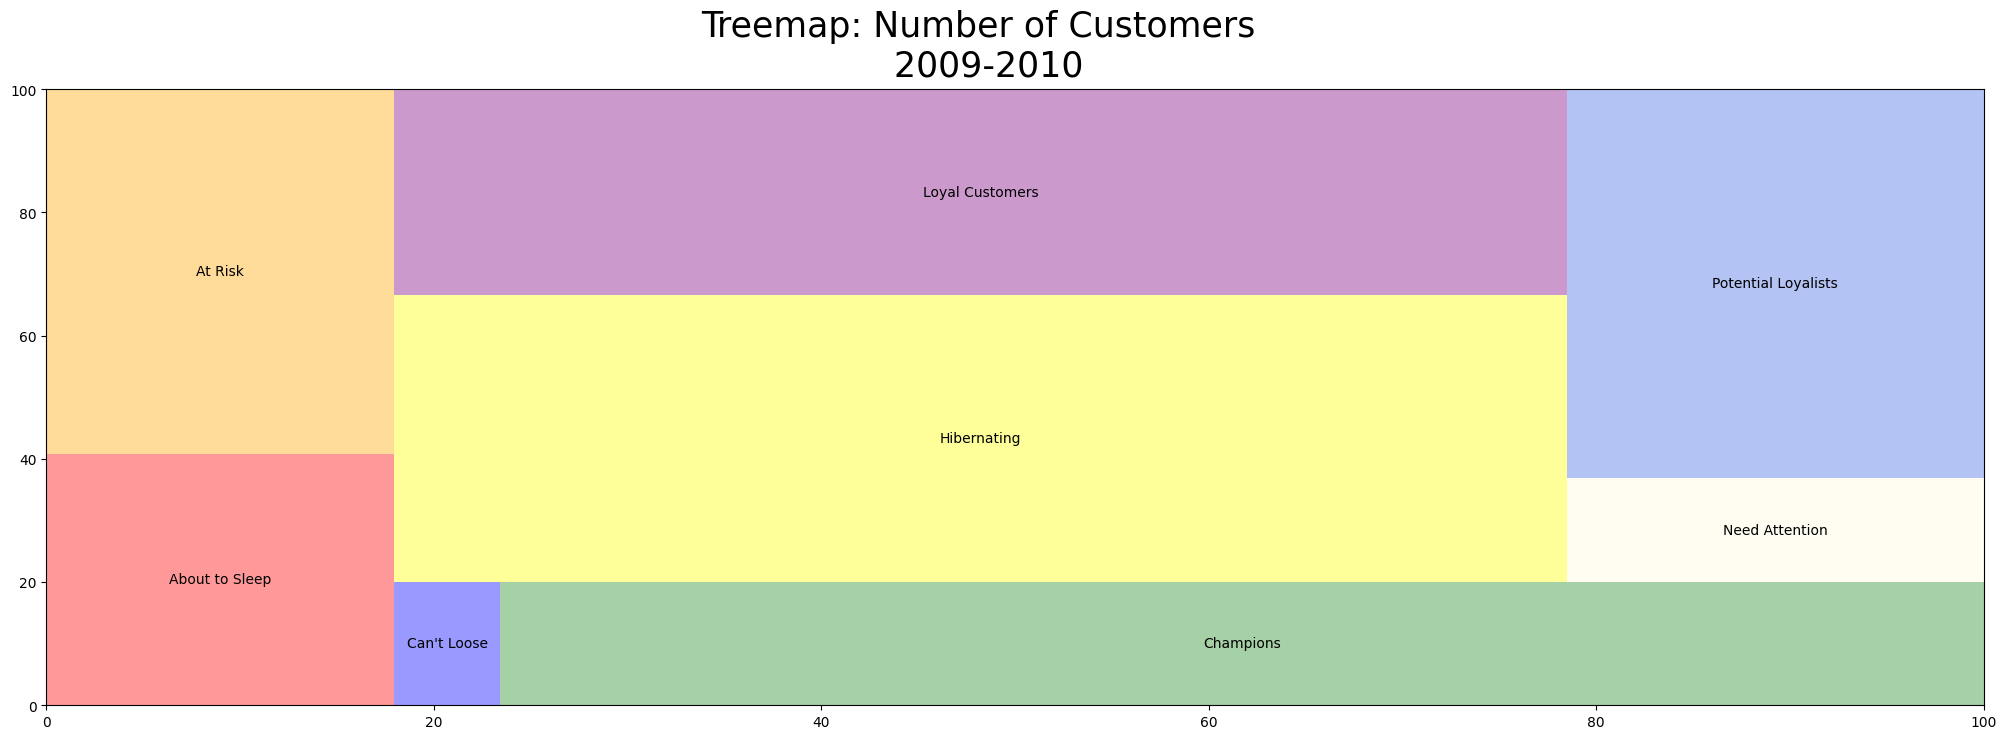

In [ ]:
import squarify
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index,
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2009-2010", fontsize=25);


# Apriori - Country wise

In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    basket = (df1[df1['country'] == country_filter]
          .groupby(['invoiceId', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoiceId'))
    return basket

country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head()

<ipython-input-76-e0badd15a063>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket_french.applymap(encode_units)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.073814,0.068541,0.052724,0.714286,10.421245,1.0,0.047665,3.260105,0.976091,0.588235,0.693261,0.741758
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.068541,0.073814,0.052724,0.769231,10.421245,1.0,0.047665,4.013474,0.970566,0.588235,0.750839,0.741758
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.068541,0.068541,0.056239,0.820513,11.971072,1.0,0.051541,5.189556,0.983903,0.695652,0.807305,0.820513
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.068541,0.068541,0.056239,0.820513,11.971072,1.0,0.051541,5.189556,0.983903,0.695652,0.807305,0.820513
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.068541,0.073814,0.054482,0.794872,10.768620,1.0,0.049422,4.515158,0.973889,0.620000,0.778524,0.766484


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.073814,0.068541,0.052724,0.714286,10.421245,1.0,0.047665,3.260105,0.976091,0.588235,0.693261,0.741758
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.068541,0.073814,0.052724,0.769231,10.421245,1.0,0.047665,4.013474,0.970566,0.588235,0.750839,0.741758
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.068541,0.068541,0.056239,0.820513,11.971072,1.0,0.051541,5.189556,0.983903,0.695652,0.807305,0.820513
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.068541,0.068541,0.056239,0.820513,11.971072,1.0,0.051541,5.189556,0.983903,0.695652,0.807305,0.820513
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.068541,0.073814,0.054482,0.794872,10.768620,1.0,0.049422,4.515158,0.973889,0.620000,0.778524,0.766484
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.073814,0.068541,0.054482,0.738095,10.768620,1.0,0.049422,3.556479,0.979433,0.620000,0.718823,0.766484
6,(SPACEBOY LUNCH BOX ),(CIRCUS PARADE LUNCH BOX ),0.114236,0.082601,0.052724,0.461538,5.587561,1.0,0.043288,1.703741,0.926918,0.365854,0.413056,0.549918
7,(CIRCUS PARADE LUNCH BOX ),(SPACEBOY LUNCH BOX ),0.082601,0.114236,0.052724,0.638298,5.587561,1.0,0.043288,2.448878,0.894955,0.365854,0.591650,0.549918
8,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.098418,0.114236,0.070299,0.714286,6.252747,1.0,0.059056,3.100176,0.931774,0.493827,0.677438,0.664835
9,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.114236,0.098418,0.070299,0.615385,6.252747,1.0,0.059056,2.344112,0.948413,0.493827,0.573399,0.664835


In [ ]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.052724,0.714286,10.421245
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.052724,0.769231,10.421245
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.056239,0.820513,11.971072
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.056239,0.820513,11.971072
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.054482,0.794872,10.768620
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.054482,0.738095,10.768620
6,(SPACEBOY LUNCH BOX ),(CIRCUS PARADE LUNCH BOX ),0.052724,0.461538,5.587561
7,(CIRCUS PARADE LUNCH BOX ),(SPACEBOY LUNCH BOX ),0.052724,0.638298,5.587561
8,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.070299,0.714286,6.252747
9,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.070299,0.615385,6.252747


In [ ]:
basket_germany = create_basket("Germany")
basket2_sets = basket_germany.applymap(encode_units)
basket2_sets.drop('POSTAGE', inplace=True, axis=1)

<ipython-input-79-300debdb8653>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket2_sets = basket_germany.applymap(encode_units)


In [ ]:
frequent_itemsets_germany = apriori(basket2_sets, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules = association_rules(frequent_itemsets_germany, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.125348,0.110028,0.058496,0.466667,4.241350,1.0,0.044704,1.668698,0.873749,0.330709,0.400730,0.499156
1,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.110028,0.125348,0.058496,0.531646,4.241350,1.0,0.044704,1.867500,0.858708,0.330709,0.464525,0.499156
2,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.110028,0.259053,0.052925,0.481013,1.856812,1.0,0.024422,1.427679,0.518491,0.167401,0.299562,0.342657
3,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN CIRCUS PARADE ),0.259053,0.110028,0.052925,0.204301,1.856812,1.0,0.024422,1.118479,0.622774,0.167401,0.105928,0.342657
4,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.125348,0.259053,0.065460,0.522222,2.015890,1.0,0.032988,1.550819,0.576162,0.205240,0.355180,0.387455


## Winter Holt

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df_forecast = df1.groupby([pd.to_datetime(df1['date']).dt.to_period('M'), 'country','stockCode'])['sales'].sum().reset_index()
df_forecast['date'] = df_forecast['date'].dt.to_timestamp()


# Aggregate sales by month & country & products
df_forecast = df1.groupby([pd.to_datetime(df1['date']).dt.to_period('M'), 'country','stockCode'])['sales'].sum().reset_index()
df_forecast['date'] = df_forecast['date'].dt.to_timestamp()

forecast_list = []

grouped = df_forecast.groupby(['country', 'stockCode'])

for (country, stockCode), group in grouped:
  temp = df_forecast[(df_forecast['stockCode'] == stockCode) & (df_forecast['country'] == country)]
  temp = temp.set_index('date').resample('M').sum().fillna(0)
  # print(temp)

  # Only fit model if enough data (2 full seasonal cycles = 24 months)
  if len(temp) >= 24:
      model = ExponentialSmoothing(temp['sales'], seasonal='add', seasonal_periods=12).fit()
      pred = model.forecast(12)  # Forecast next 6 months

      pred_df = pred.reset_index()
      pred_df['country'] = country
      pred_df['stockCode']=stockCode
      pred_df.rename(columns={0: 'forecast_sales'}, inplace=True)
      # print(pred_df)

      forecast_list.append(pred_df)

# Combine all forecasts
forecast_df = pd.concat(forecast_list)
forecast_df
forecast_df.to_csv('/content/winter-holt.csv')

Streaming output truncated to the last 5000 lines.
<ipython-input-84-222d4b1c33f9>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp = temp.set_index('date').resample('M').sum().fillna(0)
<ipython-input-84-222d4b1c33f9>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.set_index('date').resample('M').sum().fillna(0)
<ipython-input-84-222d4b1c33f9>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp = temp.set_index('date').resample('M').sum().fillna(0)
<ipython-input-84-222d4b1c33f9>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=F

In [ ]:
#rules.head()

In [ ]:
agg_country = (
    df1.groupby("country")
    ['sales']
    .agg(['std', 'sum', 'mean', 'median', 'count'])
).reset_index()


# sort by total
agg_country = agg_country.sort_values("sum", ascending=False)
agg_country.head(10)

,country,std,sum,mean,median,count
9,United Kingdom,11.529808,8240398.547,10.571078,6.80,779523
2,EIRE,13.033355,238159.840,19.600020,16.50,12151
4,Germany,12.027297,229443.381,18.590454,16.50,12342
3,France,10.857749,174733.880,17.053863,15.30,10246
8,Switzerland,14.989632,43834.450,20.560249,17.00,2132
7,Spain,10.230713,41896.790,15.103385,15.00,2774
1,Belgium,8.426733,41239.930,17.684361,16.50,2332
6,Portugal,10.885722,31329.730,15.976405,15.30,1961
5,Netherlands,22.128920,29673.300,18.126634,13.52,1637
0,Australia,19.027846,18702.490,22.028846,16.60,849


In [ ]:
top_10_countries = agg_country.sort_values('sum', ascending=False).head(10)['country'].tolist()
print(top_10_countries)

['United Kingdom', 'EIRE', 'Germany', 'France', 'Switzerland', 'Spain', 'Belgium', 'Portugal', 'Netherlands', 'Australia']


# Apriori by Each Country

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# # --- United Kingdom ---
# df_uk = df1[df1['country'] == 'United Kingdom']
# basket_uk = df_uk.groupby(['customerId', 'description'])['sales'].sum().unstack().fillna(0)
# basket_uk = basket_uk.applymap(lambda x: 1 if x > 0 else 0)
# frequent_uk = apriori(basket_uk, min_support=0.05, use_colnames=True)
# rules_uk = association_rules(frequent_uk, metric="lift", min_threshold=1.0)
# rules_uk['antecedents'] = rules_uk['antecedents'].apply(lambda x: next(iter(x)))
# rules_uk['consequents'] = rules_uk['consequents'].apply(lambda x: next(iter(x)))
# rules_uk['country'] = 'United Kingdom'
# rules_uk = rules_uk[['country', 'antecedents', 'consequents', 'support', 'confidence', 'lift']]







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

def encode(x):
    return 1 if x > 0 else 0

def prepare_basket(df, country):
    df_country = df[df['country'] == country]
    basket = df_country.pivot_table(index='invoiceId', columns='description', values='quantity', aggfunc='sum', fill_value=0)
    basket = basket.applymap(encode)
    return basket.drop(columns='POSTAGE', errors='ignore')

def generate_rules(basket, min_support=0.05, min_lift=1.2):
    frequent = apriori(basket, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent, metric='lift', min_threshold=min_lift)
    return rules

country = 'EIRE'
basket_eire = prepare_basket(df1, country)
rules_eire = generate_rules(basket_eire)
rules_eire['country']='EIRE'
print(rules_eire.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)


                          antecedents                         consequents  \
0   (GREEN REGENCY TEACUP AND SAUCER)    (PINK REGENCY TEACUP AND SAUCER)   
1    (PINK REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
2   (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
3  (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   
4              (IVORY KITCHEN SCALES)                (RED KITCHEN SCALES)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.073171            0.060038  0.056285    0.769231  12.812500   
1            0.060038            0.073171  0.056285    0.937500  12.812500   
2            0.073171            0.086304  0.065666    0.897436  10.398551   
3            0.086304            0.073171  0.065666    0.760870  10.398551   
4            0.099437            0.071295  0.060038    0.603774   8.468719   

   representativity  leverage  conviction  zhangs_metric   jaccard  

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
basket_de = prepare_basket(df1, 'Germany')
rules_de = generate_rules(basket_de)
rules_de['country']='Germany'
print("Rules for Germany")
print(rules_de.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)


Rules for Germany
                             antecedents  \
0     (PLASTERS IN TIN WOODLAND ANIMALS)   
1       (PLASTERS IN TIN CIRCUS PARADE )   
2       (PLASTERS IN TIN CIRCUS PARADE )   
3  (ROUND SNACK BOXES SET OF4 WOODLAND )   
4     (PLASTERS IN TIN WOODLAND ANIMALS)   

                             consequents  antecedent support  \
0       (PLASTERS IN TIN CIRCUS PARADE )            0.125348   
1     (PLASTERS IN TIN WOODLAND ANIMALS)            0.110028   
2  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.110028   
3       (PLASTERS IN TIN CIRCUS PARADE )            0.259053   
4  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.125348   

   consequent support   support  confidence      lift  representativity  \
0            0.110028  0.058496    0.466667  4.241350               1.0   
1            0.125348  0.058496    0.531646  4.241350               1.0   
2            0.259053  0.052925    0.481013  1.856812               1.0   
3            0.110028  0.052925 

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
basket_fr = prepare_basket(df1, 'France')
rules_fr = generate_rules(basket_fr)
rules_fr['country']='France'
print("Rules for France")
print(rules_fr.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)


Rules for France
                    antecedents                   consequents  \
0   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
2   (ALARM CLOCK BAKELIKE RED )  (ALARM CLOCK BAKELIKE GREEN)   
3  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE RED )   
4   (ALARM CLOCK BAKELIKE RED )   (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.073814            0.068541  0.052724    0.714286  10.421245   
1            0.068541            0.073814  0.052724    0.769231  10.421245   
2            0.068541            0.068541  0.056239    0.820513  11.971072   
3            0.068541            0.068541  0.056239    0.820513  11.971072   
4            0.068541            0.073814  0.054482    0.794872  10.768620   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.047665    3.260105 

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
basket_ch = prepare_basket(df1, 'Switzerland')
rules_ch = generate_rules(basket_ch)
rules_ch['country']='Switzerland'
print("Rules for Switzerland")
print(rules_ch.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Switzerland
                        antecedents                       consequents  \
0     (RIBBON REEL STRIPES DESIGN )          (6 RIBBONS RUSTIC CHARM)   
1          (6 RIBBONS RUSTIC CHARM)     (RIBBON REEL STRIPES DESIGN )   
2      (ALARM CLOCK BAKELIKE GREEN)  (ALARM CLOCK BAKELIKE CHOCOLATE)   
3  (ALARM CLOCK BAKELIKE CHOCOLATE)      (ALARM CLOCK BAKELIKE GREEN)   
4     (ALARM CLOCK BAKELIKE ORANGE)      (ALARM CLOCK BAKELIKE GREEN)   

   antecedent support  consequent support  support  confidence       lift  \
0              0.0500              0.0875   0.0500    1.000000  11.428571   
1              0.0875              0.0500   0.0500    0.571429  11.428571   
2              0.0875              0.0625   0.0625    0.714286  11.428571   
3              0.0625              0.0875   0.0625    1.000000  11.428571   
4              0.0500              0.0875   0.0500    1.000000  11.428571   

   representativity  leverage  conviction  zhangs_metric   jaccard  certaint

In [ ]:
basket_es = prepare_basket(df1, 'Spain')
rules_es = generate_rules(basket_es)
rules_es['country']='Spain'
print("Rules for Spain")
print(rules_es.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)


Rules for Spain
                          antecedents                         consequents  \
0  (PLASTERS IN TIN WOODLAND ANIMALS)            (6 RIBBONS RUSTIC CHARM)   
1            (6 RIBBONS RUSTIC CHARM)  (PLASTERS IN TIN WOODLAND ANIMALS)   
2              (DOLLY GIRL LUNCH BOX)               (SPACEBOY LUNCH BOX )   
3               (SPACEBOY LUNCH BOX )              (DOLLY GIRL LUNCH BOX)   
4         (POPPY'S PLAYHOUSE KITCHEN)        (POPPY'S PLAYHOUSE BEDROOM )   

   antecedent support  consequent support   support  confidence       lift  \
0            0.093750            0.132812  0.054688    0.583333   4.392157   
1            0.132812            0.093750  0.054688    0.411765   4.392157   
2            0.085938            0.117188  0.062500    0.727273   6.206061   
3            0.117188            0.085938  0.062500    0.533333   6.206061   
4            0.054688            0.062500  0.054688    1.000000  16.000000   

   representativity  leverage  conviction  zhangs_me

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
basket_nl = prepare_basket(df1, 'Netherlands')
rules_nl = generate_rules(basket_nl)
rules_nl['country']='Netherlands'
print("Rules for Netherlands")
print(rules_nl.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Netherlands
                        antecedents                       consequents  \
0            (DOLLY GIRL LUNCH BOX)             (SPACEBOY LUNCH BOX )   
1             (SPACEBOY LUNCH BOX )            (DOLLY GIRL LUNCH BOX)   
2  (PACK OF 20 SKULL PAPER NAPKINS)      (PACK OF 6 SKULL PAPER CUPS)   
3      (PACK OF 6 SKULL PAPER CUPS)  (PACK OF 20 SKULL PAPER NAPKINS)   
4    (PACK OF 6 SKULL PAPER PLATES)  (PACK OF 20 SKULL PAPER NAPKINS)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.076389            0.083333  0.062500    0.818182   9.818182   
1            0.083333            0.076389  0.062500    0.750000   9.818182   
2            0.076389            0.083333  0.069444    0.909091  10.909091   
3            0.083333            0.076389  0.069444    0.833333  10.909091   
4            0.076389            0.076389  0.062500    0.818182  10.710744   

   representativity  leverage  conviction  zhangs_metric   jaccard  ce

In [ ]:
basket_be = prepare_basket(df1, 'Belgium')
rules_be = generate_rules(basket_be)
rules_be['country']='Belgium'
print("Rules for Belgium")
print(rules_be.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Belgium
                    antecedents                   consequents  \
0   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
2   (ALARM CLOCK BAKELIKE RED )  (ALARM CLOCK BAKELIKE GREEN)   
3  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE RED )   
4   (ALARM CLOCK BAKELIKE RED )   (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.070922            0.099291  0.056738    0.800000  8.057143   
1            0.099291            0.070922  0.056738    0.571429  8.057143   
2            0.113475            0.099291  0.085106    0.750000  7.553571   
3            0.099291            0.113475  0.085106    0.857143  7.553571   
4            0.113475            0.070922  0.063830    0.562500  7.931250   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.049696    4.503546      

In [ ]:
basket_pt = prepare_basket(df1, 'Portugal')
rules_pt = generate_rules(basket_pt)
rules_pt['country']='Portugal'
print("Rules for Portugal")
print(rules_pt.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Portugal
                          antecedents                         consequents  \
0  (RETROSPOT TEA SET CERAMIC 11 PC )       (4 TRADITIONAL SPINNING TOPS)   
1       (4 TRADITIONAL SPINNING TOPS)  (RETROSPOT TEA SET CERAMIC 11 PC )   
2            (RED SPOTTY BISCUIT TIN)     (BAKING SET 9 PIECE RETROSPOT )   
3     (BAKING SET 9 PIECE RETROSPOT )            (RED SPOTTY BISCUIT TIN)   
4  (RETROSPOT TEA SET CERAMIC 11 PC )     (BAKING SET 9 PIECE RETROSPOT )   

   antecedent support  consequent support   support  confidence      lift  \
0            0.182927            0.109756  0.060976    0.333333  3.037037   
1            0.109756            0.182927  0.060976    0.555556  3.037037   
2            0.182927            0.207317  0.073171    0.400000  1.929412   
3            0.207317            0.182927  0.073171    0.352941  1.929412   
4            0.182927            0.207317  0.097561    0.533333  2.572549   

   representativity  leverage  conviction  zhangs_metri

In [ ]:
basket_au = prepare_basket(df1, 'Australia')
rules_au = generate_rules(basket_au)
rules_au['country']='Australia'
print("Rules for Australia")
print(rules_au.head())


<ipython-input-101-d8edfae738a3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Australia
                       antecedents                      consequents  \
0      (ALARM CLOCK BAKELIKE RED )     (ALARM CLOCK BAKELIKE GREEN)   
1     (ALARM CLOCK BAKELIKE GREEN)      (ALARM CLOCK BAKELIKE RED )   
2     (BAKING SET SPACEBOY DESIGN)  (BAKING SET 9 PIECE RETROSPOT )   
3  (BAKING SET 9 PIECE RETROSPOT )     (BAKING SET SPACEBOY DESIGN)   
4   (BLACK/BLUE POLKADOT UMBRELLA)         (RED RETROSPOT UMBRELLA)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.067568            0.067568  0.067568    1.000000  14.800000   
1            0.067568            0.067568  0.067568    1.000000  14.800000   
2            0.067568            0.094595  0.054054    0.800000   8.457143   
3            0.094595            0.067568  0.054054    0.571429   8.457143   
4            0.067568            0.054054  0.054054    0.800000  14.800000   

   representativity  leverage  conviction  zhangs_metric  jaccard  certainty  \
0   

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

def encode_units(x):
    return 1 if x >= 1 else 0

def create_basket(country_filter):
    # Filter for country
    df_country = df1[df1['country'] == country_filter]

    # OPTIONAL: Filter to remove invoices with very few or very many items
    invoice_counts = df_country['invoiceId'].value_counts()
    valid_invoices = invoice_counts[(invoice_counts >= 2) & (invoice_counts <= 10000000)].index
    df_country = df_country[df_country['invoiceId'].isin(valid_invoices)]

    # Create basket
    basket = (df_country
              .groupby(['invoiceId', 'description'])['quantity']
              .sum()
              .unstack()
              .fillna(0))
    return basket

# Use United Kingdom
basket_uk = create_basket("United Kingdom")

# Reduce basket to top N products (optional memory control)
top_items = basket_uk.sum().sort_values(ascending=False).head(100).index
basket_uk = basket_uk[top_items]

# Encode
basket_sets = basket_uk.applymap(encode_units)

# Drop POSTAGE safely
basket_sets.drop('POSTAGE', axis=1, errors='ignore', inplace=True)

# Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Association Rules
rules_uk = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules_uk['country']='United Kingdom'
# Output
print("Frequent itemsets found:", len(frequent_itemsets))
print("Rules found:", len(rules))
print(rules.head())


<ipython-input-110-b1cf2bc9f082>:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket_uk.applymap(encode_units)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent itemsets found: 389
Rules found: 14
                             antecedents  \
0     (PLASTERS IN TIN WOODLAND ANIMALS)   
1       (PLASTERS IN TIN CIRCUS PARADE )   
2       (PLASTERS IN TIN CIRCUS PARADE )   
3  (ROUND SNACK BOXES SET OF4 WOODLAND )   
4     (PLASTERS IN TIN WOODLAND ANIMALS)   

                             consequents  antecedent support  \
0       (PLASTERS IN TIN CIRCUS PARADE )            0.125348   
1     (PLASTERS IN TIN WOODLAND ANIMALS)            0.110028   
2  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.110028   
3       (PLASTERS IN TIN CIRCUS PARADE )            0.259053   
4  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.125348   

   consequent support   support  confidence      lift  representativity  \
0            0.110028  0.058496    0.466667  4.241350               1.0   
1            0.125348  0.058496    0.531646  4.241350               1.0   
2            0.259053  0.052925    0.481013  1.856812               1.0   
3    

In [ ]:
final_rules = pd.concat([
    rules_uk, rules_eire, rules_de, rules_fr, rules_ch,
    rules_es, rules_nl, rules_be, rules_pt, rules_au
], ignore_index=True)

In [ ]:
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,country
0,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140416,0.062444,0.016258,0.115784,1.854213,1.0,0.007490,1.060325,0.535943,0.087127,0.056893,0.188073,United Kingdom
1,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.062444,0.140416,0.016258,0.260361,1.854213,1.0,0.007490,1.162167,0.491371,0.087127,0.139539,0.188073,United Kingdom
2,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.140416,0.085404,0.019841,0.141304,1.654534,1.0,0.007849,1.065099,0.460223,0.096327,0.061120,0.186814,United Kingdom
3,(JUMBO BAG RED RETROSPOT),(WHITE HANGING HEART T-LIGHT HOLDER),0.085404,0.140416,0.019841,0.232323,1.654534,1.0,0.007849,1.119721,0.432541,0.096327,0.106921,0.186814,United Kingdom
4,(LUNCH BAG BLACK SKULL.),(WHITE HANGING HEART T-LIGHT HOLDER),0.071004,0.140416,0.015959,0.224766,1.600717,1.0,0.005989,1.108806,0.403963,0.081650,0.098129,0.169212,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(RED BABY BUNTING ),0.067568,0.067568,0.054054,0.800000,11.840000,1.0,0.049489,4.662162,0.981884,0.666667,0.785507,0.800000,Australia
1506,(PINK HAPPY BIRTHDAY BUNTING),(PARTY BUNTING),0.094595,0.081081,0.067568,0.714286,8.809524,1.0,0.059898,3.216216,0.979104,0.625000,0.689076,0.773810,Australia
1507,(PARTY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.081081,0.094595,0.067568,0.833333,8.809524,1.0,0.059898,5.432432,0.964706,0.625000,0.815920,0.773810,Australia
1508,(SET OF 3 CAKE TINS PANTRY DESIGN ),(PARTY BUNTING),0.067568,0.081081,0.054054,0.800000,9.866667,1.0,0.048576,4.594595,0.963768,0.571429,0.782353,0.733333,Australia


In [ ]:
final_rules[['antecedents',	'consequents',	'antecedent support',	'consequent support',	'support',	'confidence',	'lift','country']]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,country
0,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140416,0.062444,0.016258,0.115784,1.854213,United Kingdom
1,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.062444,0.140416,0.016258,0.260361,1.854213,United Kingdom
2,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.140416,0.085404,0.019841,0.141304,1.654534,United Kingdom
3,(JUMBO BAG RED RETROSPOT),(WHITE HANGING HEART T-LIGHT HOLDER),0.085404,0.140416,0.019841,0.232323,1.654534,United Kingdom
4,(LUNCH BAG BLACK SKULL.),(WHITE HANGING HEART T-LIGHT HOLDER),0.071004,0.140416,0.015959,0.224766,1.600717,United Kingdom
...,...,...,...,...,...,...,...,...
1505,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(RED BABY BUNTING ),0.067568,0.067568,0.054054,0.800000,11.840000,Australia
1506,(PINK HAPPY BIRTHDAY BUNTING),(PARTY BUNTING),0.094595,0.081081,0.067568,0.714286,8.809524,Australia
1507,(PARTY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.081081,0.094595,0.067568,0.833333,8.809524,Australia
1508,(SET OF 3 CAKE TINS PANTRY DESIGN ),(PARTY BUNTING),0.067568,0.081081,0.054054,0.800000,9.866667,Australia


In [ ]:
# # Merge RFM back to main df
df_rfm = pd.merge(df1, rfm, on='customerId', how='inner')

# # Merge Forecast separately
# df_forecast_full = df1[['country']].drop_duplicates()
# df_forecast_full = pd.merge(df_forecast_full, forecast_df, on='country', how='left')

# # Ensure that antecedents and consequents are simple values (not sets/frozensets)
# rules['antecedents'] = rules['antecedents'].apply(lambda x: next(iter(x)) if isinstance(x, (set, frozenset)) else x)
# rules['consequents'] = rules['consequents'].apply(lambda x: next(iter(x)) if isinstance(x, (set, frozenset)) else x)

# # Create a dictionary for mapping prod_id (stock code) based on antecedents
# association_dict = rules.set_index('antecedents')['consequents'].to_dict()

# # Add flags for association rules (optional, simple version)
# # Assuming `prod_id` is the column representing the product ID (stock code)
# df_final['Associated_Product'] = df_final['stockCode'].map(association_dict)

# # Final export
# df_final.to_csv('combined_tableau_ready.csv', index=False)
# print("✅ CSV file ready for Tableau at /mnt/data/combined_tableau_ready.csv")

In [ ]:
flat_rules = final_rules.explode('antecedents').explode('consequents')

In [ ]:
# Make a simple lookup from description to stockCode
desc_to_code = df1.drop_duplicates(subset='description')[['description', 'stockCode']].set_index('description')['stockCode'].to_dict()

# Extract the first (or only) item from each antecedent
flat_rules['consequents_item'] = flat_rules['consequents'].apply(lambda x: x if len(x) > 0 else None)

# Map that item to its stockCode
flat_rules['stockCode'] = flat_rules['antecedents'].map(desc_to_code)
flat_rules['consStock'] = flat_rules['consequents'].map(desc_to_code)


In [ ]:
flat_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,country,consequents_item,stockCode,consStock
0,WHITE HANGING HEART T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,0.140416,0.062444,0.016258,0.115784,1.854213,1.0,0.007490,1.060325,0.535943,0.087127,0.056893,0.188073,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,85123A,84879
1,ASSORTED COLOUR BIRD ORNAMENT,WHITE HANGING HEART T-LIGHT HOLDER,0.062444,0.140416,0.016258,0.260361,1.854213,1.0,0.007490,1.162167,0.491371,0.087127,0.139539,0.188073,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,84879,85123A
2,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,0.140416,0.085404,0.019841,0.141304,1.654534,1.0,0.007849,1.065099,0.460223,0.096327,0.061120,0.186814,United Kingdom,JUMBO BAG RED RETROSPOT,85123A,85099B
3,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,0.085404,0.140416,0.019841,0.232323,1.654534,1.0,0.007849,1.119721,0.432541,0.096327,0.106921,0.186814,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,85099B,85123A
4,LUNCH BAG BLACK SKULL.,WHITE HANGING HEART T-LIGHT HOLDER,0.071004,0.140416,0.015959,0.224766,1.600717,1.0,0.005989,1.108806,0.403963,0.081650,0.098129,0.169212,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,20727,85123A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,PAPER CHAIN KIT VINTAGE CHRISTMAS,RED BABY BUNTING,0.067568,0.067568,0.054054,0.800000,11.840000,1.0,0.049489,4.662162,0.981884,0.666667,0.785507,0.800000,Australia,RED BABY BUNTING,22910,22669
1506,PINK HAPPY BIRTHDAY BUNTING,PARTY BUNTING,0.094595,0.081081,0.067568,0.714286,8.809524,1.0,0.059898,3.216216,0.979104,0.625000,0.689076,0.773810,Australia,PARTY BUNTING,47590B,47566
1507,PARTY BUNTING,PINK HAPPY BIRTHDAY BUNTING,0.081081,0.094595,0.067568,0.833333,8.809524,1.0,0.059898,5.432432,0.964706,0.625000,0.815920,0.773810,Australia,PINK HAPPY BIRTHDAY BUNTING,47566,47590B
1508,SET OF 3 CAKE TINS PANTRY DESIGN,PARTY BUNTING,0.067568,0.081081,0.054054,0.800000,9.866667,1.0,0.048576,4.594595,0.963768,0.571429,0.782353,0.733333,Australia,PARTY BUNTING,22720,47566


In [ ]:
flat_rules['stockCode'].unique()

array(['85123A', 84879, '85099B', 20727, 22411, 21232, 21931, 20728,
       22469, 22382, 22178, '85099C', '85099F', 47566, 21790, 20726,
       20725, 22086, 22457, '84970S', '82494L', 82482, 84836, 84978,
       22077, 22470, 21929, 21181, 21231, 20723, 21175, 21733, '84970L',
       22355, 20719, 21754, 85152, 22379, 84378, 22219, 21166, 20712,
       21731, 22296, 82580, 22666, 22699, 21174, 21314, 82583, 21136,
       22386, 21930, 22384, 20713, 20724, 22385, 23201, 23202, 20711,
       23199, 22383, 23206, 21791, 21889, 22910, 22909, 20972, 20971,
       22149, 82600, 22356, 22147, 84380, 22865, 22866, 22867, 22697,
       22698, 22624, 22625, 22554, 22556, 22326, 22328, 22728, 22726,
       22727, 22629, 22631, 22630, 22352, 21559, 22551, 21094, 21086,
       22082, 22725, 22729, 20961, 20963, 20750, 20749, '85014A', 20685,
       22090, '47590A', 21914, 22029, 20675, 20674, 20676, 21245, 21244,
       22623, 22716, 21156, 22367, 23254, 23256, '84997D', '84997B',
       20682, 2

In [ ]:
# Flatten the rules into single antecedent and consequent per row


# Ensure they're strings
flat_rules['stockCode'] = flat_rules['stockCode'].astype(str)
flat_rules['consStock'] = flat_rules['consStock'].astype(str)

flat_rules['stockCode'].str.strip()
flat_rules['consStock'].str.strip()
df_rfm['stockCode'] = df_rfm['stockCode'].astype(str)

inner_join = pd.merge(df_rfm, flat_rules, on='stockCode', how='inner')



# # Create a readable association string like "12345 -> 67890"
# flat_rules['Association'] = flat_rules['anteStock'] + ' -> ' + flat_rules['consStock']

# # Now map using antecedents to this combined string
# assoc_map = flat_rules.set_index('anteStock')['Association'].to_dict()

# # Also ensure your df_final prod_id is string


# # Map to create the new column
# df_final['Associated_Product'] = df_final['stockCode'].map(flat_rules['Association'])


In [ ]:
inner_join.columns

Index(['invoiceId', 'stockCode', 'description', 'quantity', 'date_x', 'price',
       'customerId', 'country_x', 'sales', 'date_y', 'Recency', 'Frequency',
       'Monetary', 'country_y', 'RecencyScore', 'FrequencyScore',
       'MonetaryScore', 'RFM_SCORE', 'Segment', 'antecedents', 'consequents',
       'antecedent support', 'consequent support', 'support', 'confidence',
       'lift', 'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski', 'country', 'consequents_item',
       'consStock'],
      dtype='object')

In [ ]:
df_final=inner_join.drop(['consequents_item','conviction','zhangs_metric','jaccard','certainty'	,'kulczynski','representativity','leverage','country_y','date_y','country'],axis=1)

In [ ]:
df_final

,invoiceId,stockCode,description,quantity,date_x,price,customerId,country_x,sales,Recency,...,RFM_SCORE,Segment,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,consStock
0,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85,2,...,555,Champions,HOME BUILDING BLOCK WORD,WHITE HANGING HEART T-LIGHT HOLDER,0.058330,0.140416,0.016424,0.281570,2.005255,85123A
1,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04,2,...,555,Champions,ASSORTED COLOUR BIRD ORNAMENT,WHITE HANGING HEART T-LIGHT HOLDER,0.062444,0.140416,0.016258,0.260361,1.854213,85123A
2,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04,2,...,555,Champions,ASSORTED COLOUR BIRD ORNAMENT,PAINTED METAL PEARS ASSORTED,0.062444,0.019908,0.012708,0.203507,10.222491,21136
3,489436,22296,HEART IVORY TRELLIS LARGE,12,2009-12-01 09:06:00,1.65,13078.0,United Kingdom,19.80,2,...,555,Champions,HEART IVORY TRELLIS LARGE,WHITE HANGING HEART T-LIGHT HOLDER,0.024122,0.140416,0.010684,0.442916,3.154312,85123A
4,489436,21181,PLEASE ONE PERSON METAL SIGN,12,2009-12-01 09:06:00,2.10,13078.0,United Kingdom,25.20,2,...,555,Champions,PLEASE ONE PERSON METAL SIGN,WHITE HANGING HEART T-LIGHT HOLDER,0.044925,0.140416,0.013338,0.296898,2.114417,85123A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706324,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,-1,...,543,Champions,PACK OF 20 SPACEBOY NAPKINS,PLASTERS IN TIN SPACEBOY,0.062500,0.212500,0.050000,0.800000,3.764706,22551
2706325,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,-1,...,543,Champions,CHILDRENS CUTLERY DOLLY GIRL,CHILDRENS CUTLERY SPACEBOY,0.062500,0.125000,0.062500,1.000000,8.000000,23256
2706326,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,-1,...,543,Champions,BAKING SET 9 PIECE RETROSPOT,RED SPOTTY BISCUIT TIN,0.207317,0.182927,0.073171,0.352941,1.929412,21218
2706327,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,-1,...,543,Champions,BAKING SET 9 PIECE RETROSPOT,RETROSPOT TEA SET CERAMIC 11 PC,0.207317,0.182927,0.097561,0.470588,2.572549,22139


In [ ]:
df_final['Associated_Product']=df_final['antecedents'] +str(",") +	df_final['consequents']

In [ ]:
len(df_final)

2706329

In [ ]:
df_final

,invoiceId,stockCode,description,quantity,date_x,price,customerId,country_x,sales,Recency,...,Segment,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,consStock,Associated_Product
0,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85,2,...,Champions,HOME BUILDING BLOCK WORD,WHITE HANGING HEART T-LIGHT HOLDER,0.058330,0.140416,0.016424,0.281570,2.005255,85123A,"HOME BUILDING BLOCK WORD,WHITE HANGING HEART T..."
1,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04,2,...,Champions,ASSORTED COLOUR BIRD ORNAMENT,WHITE HANGING HEART T-LIGHT HOLDER,0.062444,0.140416,0.016258,0.260361,1.854213,85123A,"ASSORTED COLOUR BIRD ORNAMENT,WHITE HANGING HE..."
2,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04,2,...,Champions,ASSORTED COLOUR BIRD ORNAMENT,PAINTED METAL PEARS ASSORTED,0.062444,0.019908,0.012708,0.203507,10.222491,21136,"ASSORTED COLOUR BIRD ORNAMENT,PAINTED METAL PE..."
3,489436,22296,HEART IVORY TRELLIS LARGE,12,2009-12-01 09:06:00,1.65,13078.0,United Kingdom,19.80,2,...,Champions,HEART IVORY TRELLIS LARGE,WHITE HANGING HEART T-LIGHT HOLDER,0.024122,0.140416,0.010684,0.442916,3.154312,85123A,"HEART IVORY TRELLIS LARGE,WHITE HANGING HEART ..."
4,489436,21181,PLEASE ONE PERSON METAL SIGN,12,2009-12-01 09:06:00,2.10,13078.0,United Kingdom,25.20,2,...,Champions,PLEASE ONE PERSON METAL SIGN,WHITE HANGING HEART T-LIGHT HOLDER,0.044925,0.140416,0.013338,0.296898,2.114417,85123A,"PLEASE ONE PERSON METAL SIGN,WHITE HANGING HEA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706324,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,-1,...,Champions,PACK OF 20 SPACEBOY NAPKINS,PLASTERS IN TIN SPACEBOY,0.062500,0.212500,0.050000,0.800000,3.764706,22551,"PACK OF 20 SPACEBOY NAPKINS,PLASTERS IN TIN SP..."
2706325,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,-1,...,Champions,CHILDRENS CUTLERY DOLLY GIRL,CHILDRENS CUTLERY SPACEBOY,0.062500,0.125000,0.062500,1.000000,8.000000,23256,"CHILDRENS CUTLERY DOLLY GIRL ,CHILDRENS CUTLER..."
2706326,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,-1,...,Champions,BAKING SET 9 PIECE RETROSPOT,RED SPOTTY BISCUIT TIN,0.207317,0.182927,0.073171,0.352941,1.929412,21218,"BAKING SET 9 PIECE RETROSPOT ,RED SPOTTY BISCU..."
2706327,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,-1,...,Champions,BAKING SET 9 PIECE RETROSPOT,RETROSPOT TEA SET CERAMIC 11 PC,0.207317,0.182927,0.097561,0.470588,2.572549,22139,"BAKING SET 9 PIECE RETROSPOT ,RETROSPOT TEA SE..."


In [ ]:
# df_final.head(841985).to_excel('part1.xlsx')

In [ ]:
# df_final.iloc[841986: 1683970].to_excel('part2.xlsx')

In [ ]:
# df_final.iloc[1683970:252525955].to_excel('part3.xlsx')

In [ ]:
# df_final.to_excel('merged.xlsx')

In [ ]:
# # Step 1: Convert frozensets to strings for mapping
# rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
# rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# # Step 2: Create a mapping dictionary
# assoc_map = dict(zip(rules['antecedents_str'], rules['consequents_str']))

# # Step 3: Map associated products in df_final
# df_final['Associated_Product'] = df_final['description'].map(assoc_map)


In [ ]:
df_final

,invoiceId,stockCode,description,quantity,date_x,price,customerId,country_x,sales,Recency,...,Segment,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,consStock,Associated_Product
0,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85,2,...,Champions,HOME BUILDING BLOCK WORD,WHITE HANGING HEART T-LIGHT HOLDER,0.058330,0.140416,0.016424,0.281570,2.005255,85123A,"HOME BUILDING BLOCK WORD,WHITE HANGING HEART T..."
1,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04,2,...,Champions,ASSORTED COLOUR BIRD ORNAMENT,WHITE HANGING HEART T-LIGHT HOLDER,0.062444,0.140416,0.016258,0.260361,1.854213,85123A,"ASSORTED COLOUR BIRD ORNAMENT,WHITE HANGING HE..."
2,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04,2,...,Champions,ASSORTED COLOUR BIRD ORNAMENT,PAINTED METAL PEARS ASSORTED,0.062444,0.019908,0.012708,0.203507,10.222491,21136,"ASSORTED COLOUR BIRD ORNAMENT,PAINTED METAL PE..."
3,489436,22296,HEART IVORY TRELLIS LARGE,12,2009-12-01 09:06:00,1.65,13078.0,United Kingdom,19.80,2,...,Champions,HEART IVORY TRELLIS LARGE,WHITE HANGING HEART T-LIGHT HOLDER,0.024122,0.140416,0.010684,0.442916,3.154312,85123A,"HEART IVORY TRELLIS LARGE,WHITE HANGING HEART ..."
4,489436,21181,PLEASE ONE PERSON METAL SIGN,12,2009-12-01 09:06:00,2.10,13078.0,United Kingdom,25.20,2,...,Champions,PLEASE ONE PERSON METAL SIGN,WHITE HANGING HEART T-LIGHT HOLDER,0.044925,0.140416,0.013338,0.296898,2.114417,85123A,"PLEASE ONE PERSON METAL SIGN,WHITE HANGING HEA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706324,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,-1,...,Champions,PACK OF 20 SPACEBOY NAPKINS,PLASTERS IN TIN SPACEBOY,0.062500,0.212500,0.050000,0.800000,3.764706,22551,"PACK OF 20 SPACEBOY NAPKINS,PLASTERS IN TIN SP..."
2706325,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,-1,...,Champions,CHILDRENS CUTLERY DOLLY GIRL,CHILDRENS CUTLERY SPACEBOY,0.062500,0.125000,0.062500,1.000000,8.000000,23256,"CHILDRENS CUTLERY DOLLY GIRL ,CHILDRENS CUTLER..."
2706326,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,-1,...,Champions,BAKING SET 9 PIECE RETROSPOT,RED SPOTTY BISCUIT TIN,0.207317,0.182927,0.073171,0.352941,1.929412,21218,"BAKING SET 9 PIECE RETROSPOT ,RED SPOTTY BISCU..."
2706327,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,-1,...,Champions,BAKING SET 9 PIECE RETROSPOT,RETROSPOT TEA SET CERAMIC 11 PC,0.207317,0.182927,0.097561,0.470588,2.572549,22139,"BAKING SET 9 PIECE RETROSPOT ,RETROSPOT TEA SE..."


In [ ]:
inner_join = pd.merge(df_final,, on='stockCode', how='inner')

SyntaxError: invalid syntax (<ipython-input-132-324fe6502502>, line 1)

In [ ]:
sample_df=df_final.sample(frac=0.35, replace=True, random_state=1)

In [ ]:

print(df_final['date_x'].max() - df_final['date_x'].min())

In [ ]:
df_final.customerId.unique().shape

In [ ]:
sample_df.to_excel('sampleFinal.xlsx')